In [42]:
import sys

import matplotlib.pyplot as plt
import maxi
import torch
import numpy as np

sys.path.append("../mnist/src")
from official_mnist_tf.train_mnist_model import init_model, load_mnist

from maxi.utils.transformations import intensify_pixels

In [5]:
x_train, y_train, x_test, y_test = load_mnist()

encoder = torch.load("/home/tuananhroman/dai/MAXi-XAI-lib/experiments/mnist/models/encoder_latent_dim_8.pt")
decoder = torch.load("/home/tuananhroman/dai/MAXi-XAI-lib/experiments/mnist/models/decoder_latent_dim_8.pt")

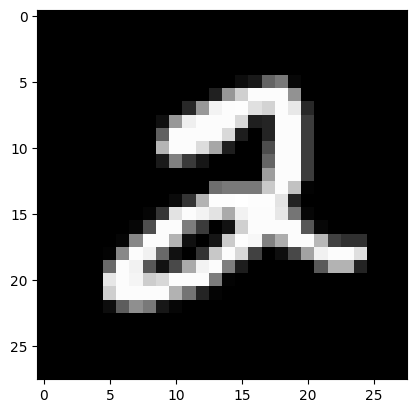

In [6]:
inputs = x_train[5].reshape(1, 28, 28)

# this is how the image looks like
plt.imshow(inputs.squeeze(axis=0), cmap="gray", vmin=-0.0, vmax=1.0)

In [56]:
_inputs = np.expand_dims(inputs, axis=0)

inference = (
    lambda x: encoder(x)
    if torch.is_tensor(x)
    else encoder(torch.tensor(x, dtype=torch.float32, device="cuda"))
)

loss_class = maxi.loss.Torch_SimDesimLoss
optimizer_class = maxi.optimizer.AdaExpGradOptimizer
gradient_class = maxi.gradient.Torch_Gradient

loss_kwargs = {"target_index": 3, "device": "cuda"}
optimizer_kwargs = {"l1": 0.005, "l2": 0.005, "channels_first": True}
gradient_kwargs = {"device": "cuda"}

expl_gen = maxi.ExplanationGenerator(
    loss=loss_class,
    optimizer=optimizer_class,
    gradient=gradient_class,
    loss_kwargs=loss_kwargs,
    optimizer_kwargs=optimizer_kwargs,
    gradient_kwargs=gradient_kwargs,
    num_iter=1000,  # number of optimization iterations
    save_freq=200,  # at which iterations the result should be saved
    verbose=True,  # print optimization metrics
)

results, _ = expl_gen.run(image=_inputs, inference_call=inference)


/home/tuananhroman/dai/MAXi-XAI-lib/src/maxi/lib/loss/torch_sim_desim_loss.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.org_prediction = th.tensor(self.org_prediction, device=device)
/home/tuananhroman/dai/MAXi-XAI-lib/src/maxi/lib/computation_components/optimizer/ada_exp_grad.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  self.y[:] = 1.0 / self.t * self.x + (1 - 1.0 / self.t) * self.y


iteration:      1 || overall_loss:   116.1247 | attack_loss: -0.1989 | l1: 116.082353 | l2: 0.241244
iteration:      2 || overall_loss:   112.3451 | attack_loss: -0.2332 | l1: 112.352425 | l2: 0.225845
iteration:      3 || overall_loss:   110.5403 | attack_loss: -0.2494 | l1: 110.571060 | l2: 0.218692
iteration:      4 || overall_loss:   108.7915 | attack_loss: -0.2649 | l1: 108.844536 | l2: 0.211879
iteration:      5 || overall_loss:   107.1017 | attack_loss: -0.2798 | l1: 107.176086 | l2: 0.205407
iteration:      6 || overall_loss:   105.4636 | attack_loss: -0.2939 | l1: 105.558197 | l2: 0.199236
iteration:      7 || overall_loss:   103.8725 | attack_loss: -0.3075 | l1: 103.986725 | l2: 0.193342
iteration:      8 || overall_loss:   102.3290 | attack_loss: -0.3207 | l1: 102.462006 | l2: 0.187713
iteration:      9 || overall_loss:   100.8282 | attack_loss: -0.3334 | l1: 100.979286 | l2: 0.182326
iteration:     10 || overall_loss:    99.3677 | attack_loss: -0.3457 | l1: 99.536270 | l2: 

In [48]:
def min_max_normalization(img: int, min_pixel_value: int, max_pixel_value: int) -> float:
    return (img - min_pixel_value) / (max_pixel_value - min_pixel_value)

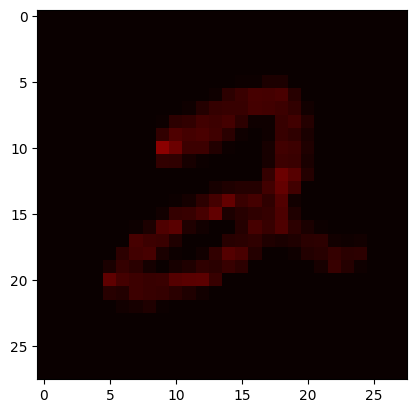

In [57]:
plt.imshow(results["1000"].squeeze(axis=0).squeeze(0) * 2, cmap="hot", vmin=-0.0, vmax=1.0)

In [52]:
results["1000"].max()

0.073225684

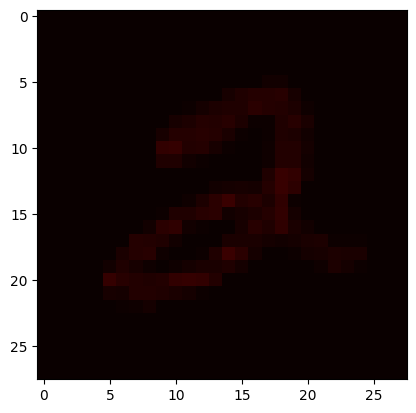

In [40]:
plt.imshow(results["1000"].squeeze(axis=0).squeeze(0), cmap="hot", vmin=-0.0, vmax=1.0)

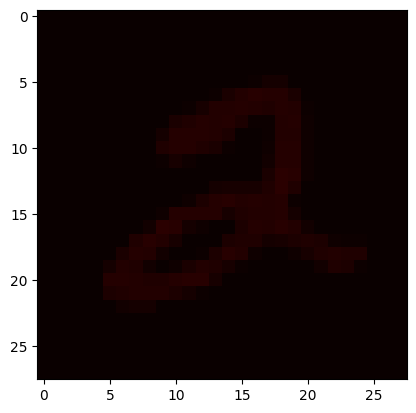

In [22]:
plt.imshow(results["1000"].squeeze(axis=0).squeeze(0), cmap="hot", vmin=-0.0, vmax=1.0)